In [1]:
from graph_functions import * 
from sample_aggregate import partition, hist_plot
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
%matplotlib inline

### Generate Graph

In [2]:
%%time
g = generatePlantedPartition(2, 5000, 0.02, 0.005)

CPU times: user 4.48 s, sys: 317 ms, total: 4.8 s
Wall time: 4.78 s


### Testing Conductance Calculation

#### Edge Conductance

In [3]:
%%time
A = np.array(nx.to_numpy_matrix(g))

CPU times: user 2.02 s, sys: 879 ms, total: 2.9 s
Wall time: 2.94 s


In [4]:
%%time
C_edge = cluster(A)

CPU times: user 54.3 s, sys: 6.09 s, total: 1min
Wall time: 30.6 s


In [5]:
%%time
cond_edge = conductance(C_edge, A)

CPU times: user 1.15 s, sys: 723 ms, total: 1.87 s
Wall time: 1.93 s


In [6]:
print cond_edge

0.250214360125


### Triangle Conductance

In [7]:
%%time
M = reweightEdgesByTri(g)

CPU times: user 5.49 s, sys: 612 ms, total: 6.1 s
Wall time: 7.52 s


In [8]:
%%time
C_tri = cluster(M)

CPU times: user 58.7 s, sys: 8.98 s, total: 1min 7s
Wall time: 39.2 s


In [9]:
%%time
cond_tri = conductance(C_tri, M)

CPU times: user 1.18 s, sys: 914 ms, total: 2.09 s
Wall time: 2.15 s


In [10]:
print cond_tri

0.118712940686


### Sample and Aggregate

In [11]:
%%time
samples = partition(g)
sample_edge_conds = [approxEdgeConductance(sg) for sg in samples]

Using 9 samples.
CPU times: user 4.24 s, sys: 811 ms, total: 5.06 s
Wall time: 4.82 s


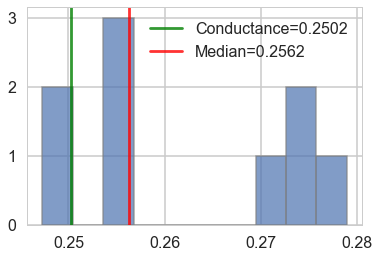

In [13]:
hist_plot(sample_edge_conds, cond_edge)

In [14]:
%%time
samples = partition(g)
sample_tri_conds = [approxTriConductance(sg) for sg in samples]

Using 9 samples.


/Users/alexandergoldberg/.virtualenvs/cs227/lib/python2.7/site-packages/sklearn/manifold/spectral_embedding_.py:229: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


CPU times: user 7.41 s, sys: 367 ms, total: 7.77 s
Wall time: 7.44 s


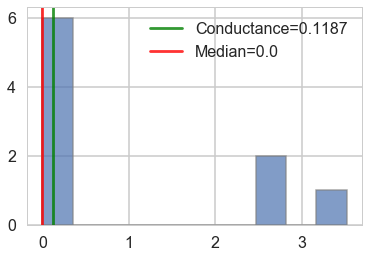

In [15]:
hist_plot(sample_tri_conds, cond_tri)

In [1]:
from sample_aggregate import dp_median

In [2]:
import numpy as np

In [3]:
a = np.array([1,2,8,9,10,3,1,2,3,1,3,2,5,6,7,9,9])

In [21]:
a

array([ 1,  1,  1,  2,  2,  2,  3,  3,  3,  5,  6,  7,  8,  9,  9,  9, 10])

In [23]:
rankdata(a)

array([  2.,   2.,   2.,   5.,   5.,   5.,   8.,   8.,   8.,  10.,  11.,
        12.,  13.,  15.,  15.,  15.,  17.])